###HW2

#Part1

$$
\begin{align*}
& \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\phi\sum_{i=1}^n x_i\theta + \phi\theta^2+ \tau\theta^2-2\tau\theta\theta_0 + \tau\theta_0^2\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\phi\sum_{i=1}^n x_i\theta + \theta^2\left(n\phi + \tau \right)-2\tau\theta\theta_0 + \tau\theta_0^2\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\theta\left(\phi \sum_{i=1}^n x_i +\tau\theta_0\right) + \theta^2\left(n\phi + \tau \right) + \tau\theta_0^2\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi x_i^2 - 2\theta\left(\phi \sum_{i=1}^n x_i +\tau\theta_0\right) + \theta^2\left(n\phi + \tau \right) + \tau\theta_0^2\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(\theta^2\left(n\phi + \tau \right) - 2\theta\left(\phi \sum_{i=1}^n x_i +\tau\theta_0\right) + \sum_{i=1}^n \phi x_i^2  + \tau\theta_0^2\right)\right]\\
\end{align*}$$

Since 

$$
\begin{align*}
 \sum_{i=1}^n \phi x_i^2  + \tau\theta_0^2 
{\propto}{}
\frac{\left(\tau\theta_0+\phi\sum_{i=1}^n x_i\right)^2}{\tau+n\phi}
\end{align*}
$$

Thus, plug this to above.

$$
\begin{align*}
& \exp\left[-\frac{1}{2}\left(\theta^2\left(n\phi + \tau \right) - 2\theta\left(\phi \sum_{i=1}^n x_i +\tau\theta_0\right) + \sum_{i=1}^n \phi x_i^2  + \tau\theta_0^2\right)\right]\\
&{\propto}{} 
\exp\left[-\frac{1}{2}\left(\theta^2\left(n\phi + \tau \right) - 2\theta\left(\phi \sum_{i=1}^n x_i +\tau\theta_0\right) + \frac{\left(\tau\theta_0+\phi\sum_{i=1}^n x_i\right)^2}{\tau+n\phi}\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(n\phi+\tau\right)\left(\theta^2 - \frac{2\theta\left(\phi \sum_{i=1}^n x_i +\tau\theta_0\right)}{n\phi+\tau} + \frac{\left(\tau\theta_0+\phi\sum_{i=1}^n x_i\right)^2}{\left(\tau+n\phi\right)^2}\right)\right]\\
&= \exp\left[-\frac{1}{2}\left(n\phi+\tau\right)\left(\theta-\left(\frac{\phi\sum_{i=1}^nx_i+\tau\theta_0}{n\phi+\tau}\right)\right)^2\right]\\
\end{align*}$$

#Part2

1. individual likelihood

Text(0.5, 1.0, 'Visualize various priors, individual likelihoods, posterior, and joint distribution')

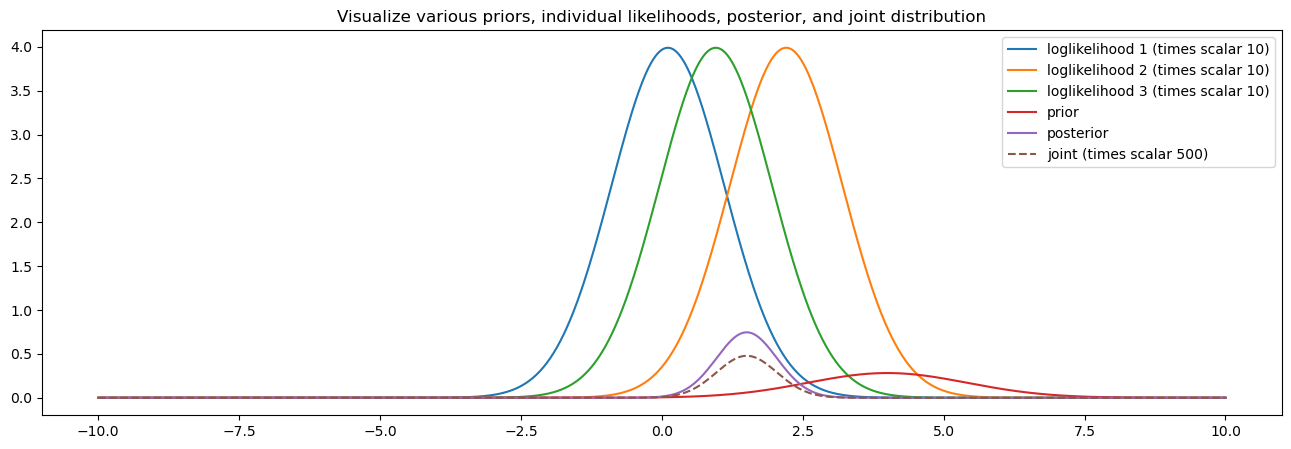

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(88)  
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

likelihoods = [stats.norm.pdf(x_i, loc=parameter_domain, scale=1) for x_i in x]

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c1, c2 = 500, 10
joint = c1 * np.prod(likelihoods, axis=0) * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16, 5))

# individual likelihoods
for i, likelihood_i in enumerate(likelihoods):
    plt.plot(parameter_domain, c2 * likelihood_i, label=f"loglikelihood {i+1} (times scalar {c2})")

plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c1)+")")

plt.legend()
plt.title("Visualize various priors, individual likelihoods, posterior, and joint distribution")

2. log

Text(0.5, 1.0, 'Visualize various priors, likelihoods, posteriors, and joint distribution on a log scale')

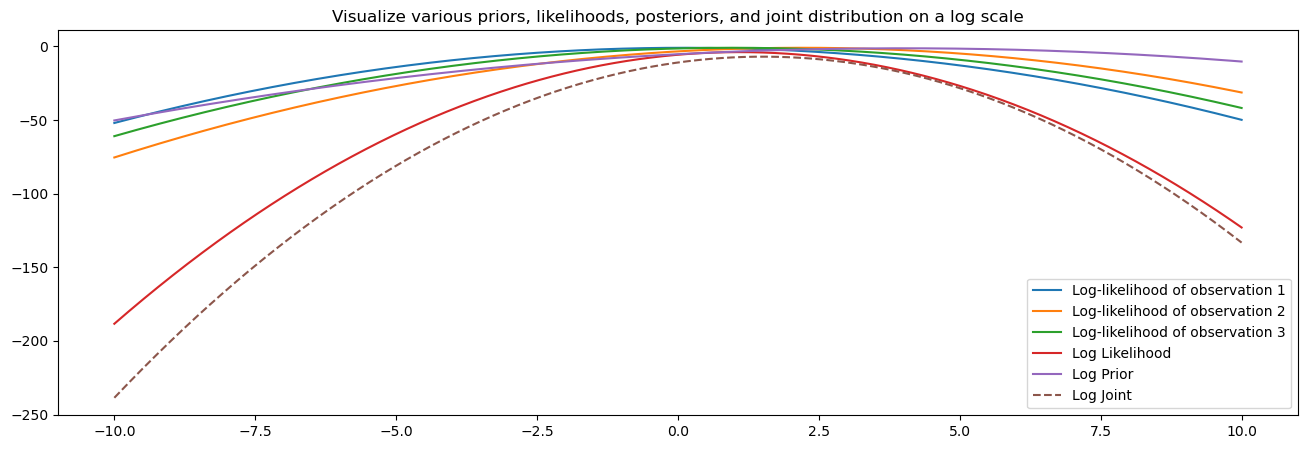

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(88) 
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
phi = 1
parameter_domain = np.linspace(-10, 10, 1001)

loglikelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])
sumloglikelihoods = loglikelihoods.sum(axis=0)
logprior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
logjoint = sumloglikelihoods + logprior

plt.figure(figsize=(16, 5))

for i, loglikelihood_i in enumerate(loglikelihoods):
    plt.plot(parameter_domain, loglikelihood_i, label=f"Log-likelihood of observation {i+1}")

plt.plot(parameter_domain, sumloglikelihoods, label="Log Likelihood ")
plt.plot(parameter_domain, logprior, label="Log Prior")
plt.plot(parameter_domain, logjoint, linestyle="--", label="Log Joint ")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors, and joint distribution on a log scale")

3.
Given that
$$
p(\theta\mid x) \propto p(\theta,x)= p(x\mid\theta)p(\theta)
$$
given that $p(\theta) \propto 1$ and $p(x\mid\theta,\phi) = \sum{i=1}_n \sqrt{\frac{\phi}{2\pi}e^{\frac{1\phi}{2}(x_i-\theta)^2}}$, thus
$$
p(\theta\mid x) \propto p(x\mid\theta)\\
p(\theta\mid x) \propto \prod_{i=1}^n \sqrt{\frac{\phi}{2\pi}e^{\frac{1\phi}{2}(x_i-\theta)^2}}\\
p(\theta\mid x) \propto e^{-\frac{\phi}{2}\sum_{i=1}^n(x_i-\theta)^2}\\
$$
where $$\sum_{i=1}^n(x_i-\theta)^2 = n \bar{x}^2-2 n \bar{x}\theta+n \theta^2 $$
Thus, 
$$-{\frac{\phi}{2}}\sum_{i=1}^n(x_i-\theta)^2 \\
= -{\frac{\phi}{2}}(n \bar{x}^2-2 n \bar{x}\theta+n \theta^2) \\
= -{\frac{\phi}{2}} n(\bar{x}^2- 2\bar{x}\theta+ \theta^2)\\
= -{\frac{\phi}{2}} n(\theta- \bar{x})^2
$$
Therefore, from the exponent of the normal distribution,
$$\theta\mid x \sim N(\bar{x},\frac{\sigma^2}{n})$$


4.
improper prior: 

This will not impact the log likelihood, since the log likelihood is just a function of data and parameters.

But improper prior will impact the posterior, since the product of likelihood and prior is posterior, if the prior is improper, then posterior must be improper too.

The marginal likelihood constant is used to normalize the posterior and make sure the integral is 1. And if there iis not enough data, then the product of likelihood and prior may not be integrable, then no matter what marginal likelihood constant is, the posterior is always improper.